<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(0_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.571792,21.185457,63.165873,76.968614,-0.749472,216.142264,216.689139,-0.546875
1,0.0,1.0,41.520581,36.144320,75.470318,63.473976,1.175996,227.785191,226.208969,1.576222
2,0.0,2.0,81.326769,96.710800,69.326857,80.358194,-0.469532,337.253088,338.216084,-0.962997
3,0.0,3.0,20.839741,41.738701,62.015351,91.078416,0.209647,225.881855,227.613018,-1.731163
4,0.0,4.0,48.874435,41.780347,96.952072,83.547641,2.579381,283.733876,280.889489,2.844388
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,92.254729,37.042936,71.238305,40.003826,-0.424737,250.115060,250.783826,-0.668766
19996,999.0,16.0,61.744553,38.131476,90.707965,51.056777,2.209077,253.849848,251.616684,2.233165
19997,999.0,17.0,92.301825,95.149107,47.803486,85.823729,1.419025,332.497172,330.300651,2.196522
19998,999.0,18.0,87.035116,79.654661,85.624608,62.694835,-2.383311,322.625909,324.437813,-1.811905


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.571792  21.185457  63.165873  76.968614 -0.749472  216.142264   
      1.0    41.520581  36.144320  75.470318  63.473976  1.175996  227.785191   
      2.0    81.326769  96.710800  69.326857  80.358194 -0.469532  337.253088   
      3.0    20.839741  41.738701  62.015351  91.078416  0.209647  225.881855   
      4.0    48.874435  41.780347  96.952072  83.547641  2.579381  283.733876   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   92.254729  37.042936  71.238305  40.003826 -0.424737  250.115060   
      16.0   61.744553  38.131476  90.707965  51.056777  2.209077  253.849848   
      17.0   92.301825  95.149107  47.803486  85.823729  1.419025  332.497172   
      18.0   87.035116  79.654661  85.624608  62.694835 -2.383311  322.625909   
      19.0   57.343623  62.804898  91.802460  46.530146 -2.488875  265.992251   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.689139 -0.546875  
      1.0    226.208969  1.576222  
      2.0    338.216084 -0.962997  
      3.0    227.613018 -1.731163  
      4.0    280.889489  2.844388  
...                 ...       ...  
999.0 15.0   250.783826 -0.668766  
      16.0   251.616684  2.233165  
      17.0   330.300651  2.196522  
      18.0   324.437813 -1.811905  
      19.0   268.502814 -2.510562  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.571792  21.185457  63.165873  76.968614 -0.749472  216.142264   
      1.0    41.520581  36.144320  75.470318  63.473976  1.175996  227.785191   
      2.0    81.326769  96.710800  69.326857  80.358194 -0.469532  337.253088   
      3.0    20.839741  41.738701  62.015351  91.078416  0.209647  225.881855   
      4.0    48.874435  41.780347  96.952072  83.547641  2.579381  283.733876   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   92.254729  37.042936  71.238305  40.003826 -0.424737  250.115060   
      16.0   61.744553  38.131476  90.707965  51.056777  2.209077  253.849848   
      17.0   92.301825  95.149107  47.803486  85.823729  1.419025  332.497172   
      18.0   87.035116  79.654661  85.624608  62.694835 -2.383311  322.625909   
      19.0   57.343623  62.804898  91.802460  46.530146 -2.488875  265.992251   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.689139 -0.546875  
      1.0    226.208969  1.576222  
      2.0    338.216084 -0.962997  
      3.0    227.613018 -1.731163  
      4.0    280.889489  2.844388  
...                 ...       ...  
999.0 15.0   250.783826 -0.668766  
      16.0   251.616684  2.233165  
      17.0   330.300651  2.196522  
      18.0   324.437813 -1.811905  
      19.0   268.502814 -2.510562  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.571792,21.185457,63.165873,76.968614,-0.749472,216.142264,216.689139,-0.546875
1,0.0,1.0,41.520581,36.144320,75.470318,63.473976,1.175996,227.785191,226.208969,1.576222
2,0.0,2.0,81.326769,96.710800,69.326857,80.358194,-0.469532,337.253088,338.216084,-0.962997
3,0.0,3.0,20.839741,41.738701,62.015351,91.078416,0.209647,225.881855,227.613018,-1.731163
4,0.0,4.0,48.874435,41.780347,96.952072,83.547641,2.579381,283.733876,280.889489,2.844388
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,92.254729,37.042936,71.238305,40.003826,-0.424737,250.115060,250.783826,-0.668766
19996,999.0,16.0,61.744553,38.131476,90.707965,51.056777,2.209077,253.849848,251.616684,2.233165
19997,999.0,17.0,92.301825,95.149107,47.803486,85.823729,1.419025,332.497172,330.300651,2.196522
19998,999.0,18.0,87.035116,79.654661,85.624608,62.694835,-2.383311,322.625909,324.437813,-1.811905


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.571792  21.185457  63.165873  76.968614 -0.749472  216.142264   
      1.0    41.520581  36.144320  75.470318  63.473976  1.175996  227.785191   
      2.0    81.326769  96.710800  69.326857  80.358194 -0.469532  337.253088   
      3.0    20.839741  41.738701  62.015351  91.078416  0.209647  225.881855   
      4.0    48.874435  41.780347  96.952072  83.547641  2.579381  283.733876   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   92.254729  37.042936  71.238305  40.003826 -0.424737  250.115060   
      16.0   61.744553  38.131476  90.707965  51.056777  2.209077  253.849848   
      17.0   92.301825  95.149107  47.803486  85.823729  1.419025  332.497172   
      18.0   87.035116  79.654661  85.624608  62.694835 -2.383311  322.625909   
      19.0   57.343623  62.804898  91.802460  46.530146 -2.488875  265.992251   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.689139 -0.546875  
      1.0    226.208969  1.576222  
      2.0    338.216084 -0.962997  
      3.0    227.613018 -1.731163  
      4.0    280.889489  2.844388  
...                 ...       ...  
999.0 15.0   250.783826 -0.668766  
      16.0   251.616684  2.233165  
      17.0   330.300651  2.196522  
      18.0   324.437813 -1.811905  
      19.0   268.502814 -2.510562  

[20000 rows x 8 columns]

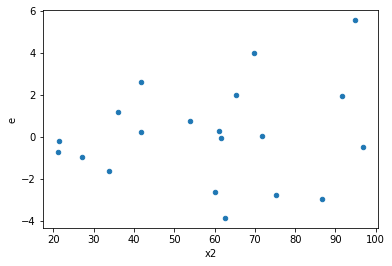

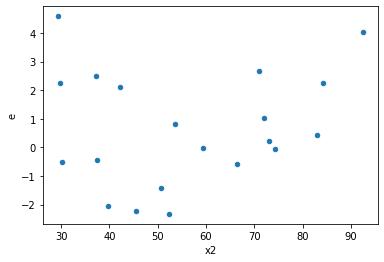

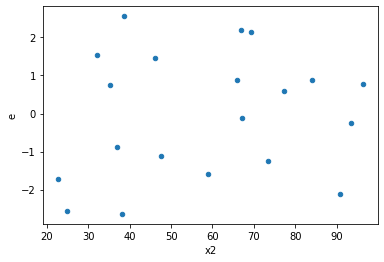

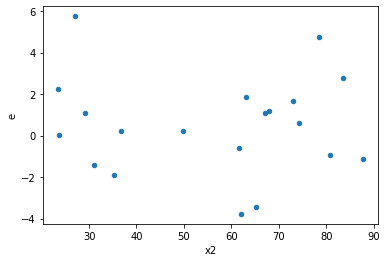

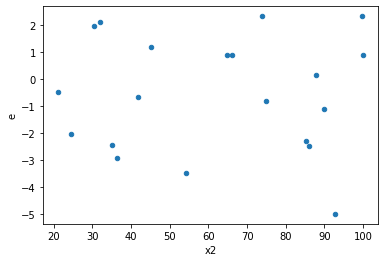

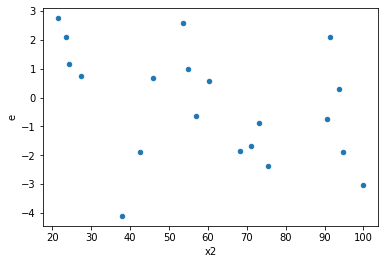

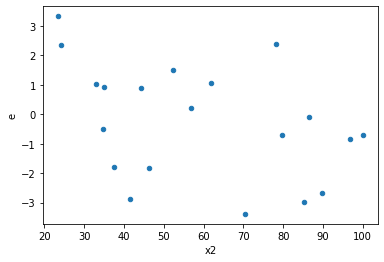

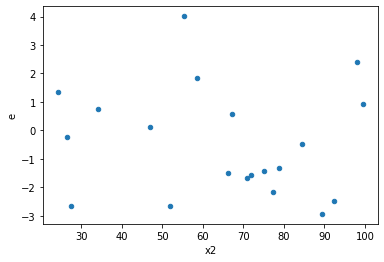

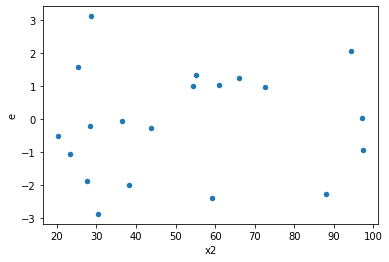

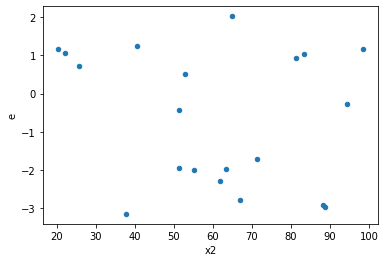

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,3.0,9.0,0.7350315814685064,60.4998196964154,0.2450105271561688,6.7222021884906,27.436381067030208,0.0001469988918860743,0.999926500554057,7.349944594303714e-05,Reject001=0 : Heteroscedasticity
4.0,3.0,9.0,10.02151217930254,41.070169475035094,3.3405040597675133,4.563352163892788,1.3660669414694202,0.6284562707021575,0.6857718646489213,0.31422813535107874,Reject001=1 : Homoscedasticity
8.0,4.0,8.0,11.12542471694001,20.97501485170606,2.7813561792350026,2.6218768564632575,0.9426613089102421,0.9736100800134708,0.5131949599932646,0.4868050400067354,Reject001=1 : Homoscedasticity
10.0,8.0,4.0,16.098204643737752,59.322066589159036,2.012275580467219,14.830516647289759,7.370022670476548,0.07094982462589461,0.9645250876870527,0.035474912312947304,Reject001=1 : Homoscedasticity
11.0,10.0,2.0,29.44312582405391,17.03020323403505,2.944312582405391,8.515101617017525,2.8920508195705943,0.5683842070544014,0.7158078964727993,0.2841921035272007,Reject001=1 : Homoscedasticity
13.0,4.0,8.0,3.695905191579875,18.945555918857263,0.9239762978949687,2.368194489857158,2.5630467959540213,0.23965355725509352,0.8801732213724532,0.11982677862754676,Reject001=1 : Homoscedasticity
14.0,4.0,8.0,13.296025238069184,56.611163961642106,3.324006309517296,7.076395495205263,2.1288754702252293,0.3372007285391605,0.8313996357304198,0.16860036426958025,Reject001=1 : Homoscedasticity
15.0,8.0,4.0,32.2950204018046,36.62669700197549,4.036877550225575,9.156674250493872,2.2682566257136556,0.4471602885921748,0.7764198557039126,0.2235801442960874,Reject001=1 : Homoscedasticity
17.0,7.0,5.0,15.5452207102323,14.898913242993022,2.2207458157474713,2.9797826485986043,1.341793656648477,0.7715748430050269,0.6142125784974866,0.38578742150251344,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,1.0,62.08053772509904,1.3664635978463883e-23,5.173378143758254,1.3664635978463883e-23,2.6413371686255798e-24,4.574804627453904e-136,Reject001=0 : Heteroscedasticity
1.0,4.0,8.0,15.827394139129577,24.546493213160083,3.9568485347823943,3.0683116516450104,0.7754432914662354,0.8580163827684456,Reject001=1 : Homoscedasticity
2.0,7.0,5.0,22.57066621836869,7.002714194945808,3.224380888338384,1.4005428389891617,0.4343602345661159,0.3071145593255614,Reject001=1 : Homoscedasticity
3.0,3.0,9.0,0.7350315814685064,60.4998196964154,0.2450105271561688,6.7222021884906,27.436381067030208,0.0001469988918860743,Reject001=0 : Heteroscedasticity
4.0,3.0,9.0,10.02151217930254,41.070169475035094,3.3405040597675133,4.563352163892788,1.3660669414694202,0.6284562707021575,Reject001=1 : Homoscedasticity
5.0,7.0,5.0,28.641226357186042,11.40600979827269,4.091603765312292,2.281201959654538,0.5575324714954223,0.4655650642279532,Reject001=1 : Homoscedasticity
6.0,4.0,8.0,7.959075269220606,7.233280292988749,1.9897688173051515,0.9041600366235937,0.4544045663797994,0.4651964604141515,Reject001=1 : Homoscedasticity
7.0,7.0,5.0,33.882001792145154,13.041847382526385,4.840285970306451,2.6083694765052767,0.5388874732829337,0.44156565337601655,Reject001=1 : Homoscedasticity
8.0,4.0,8.0,11.12542471694001,20.97501485170606,2.7813561792350026,2.6218768564632575,0.9426613089102421,0.9736100800134708,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      903
Reject001=0 : Heteroscedasticity     97
Name: Result_test, dtype: int64